In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
def dtype_compressor(df):
  #object 
  # when unique ratio > 0.5, catogory stands less memory than object
  converted_obj = pd.DataFrame()
  df_obj = df.select_dtypes(include=['object'])
  for col in df_obj.columns:
    converted_obj.loc[:,col] = df_obj.loc[:,col].astype('category')

  # numbers
  df_down_num = pd.DataFrame()
  df_num = df.select_dtypes(include=['number'])
  for col in df_num.columns:
    df_down_num.loc[:,col] = pd.to_numeric(df_num.loc[:,col],downcast='signed')

  # merge
  df = pd.concat([converted_obj,df_down_num],axis=1)
  
  del converted_obj, df_obj, df_down_num, df_num  
  
  return df

In [5]:
def fast_datetime(s):
    dates = {date:pd.to_datetime(date,format='%Y%m%d') for date in s.unique()}
    return s.map(dates)

##### 讀取csv

In [2]:
KKboxMembers = pd.read_csv("members_v3.csv")

In [24]:
print(KKboxMembers.shape)
KKboxMembers.head()

(6769473, 6)


,msno,gender,city,bd,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,Unknown,1,-1,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,Unknown,1,-1,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,Unknown,1,-1,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,Unknown,1,-1,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,female,6,32,9,2011-09-15


In [6]:
KKboxMembers = dtype_compressor(KKboxMembers)

In [25]:
KKboxMembers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      category
gender                    category
city                      int8
bd                        int64
registered_via            int8
registration_init_time    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), int8(2)
memory usage: 1.1 GB


---

* **特徵gender：**

In [13]:
KKboxMembers['gender'].unique()

[NaN, female, male]
Categories (2, object): [female, male]

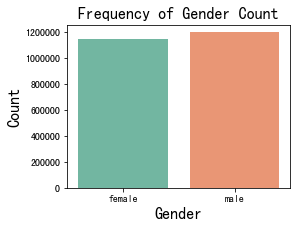

In [14]:
plt.figure(figsize=(4,3))
sns.countplot(x="gender", data=KKboxMembers, palette = "Set2")
plt.ylabel('Count', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.title("Frequency of Gender Count", fontsize=16)
plt.show()

##### 處理gender缺失值

In [23]:
KKboxMembers['gender'] = KKboxMembers['gender'].cat.add_categories('Unknown').fillna('Unknown')

* **特徵city：**

特徵city應該是經過編碼的，其中以編號1.0的city數量最多


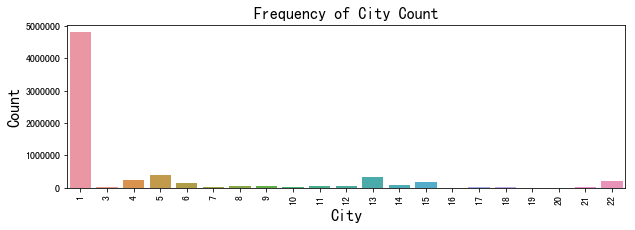

In [8]:
print('特徵city應該是經過編碼的，其中以編號1.0的city數量最多')
plt.figure(figsize=(10,3))
city_order = KKboxMembers['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=KKboxMembers , order = city_order)
plt.ylabel('Count', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count", fontsize=16)
plt.show()

* **特徵bd：**

In [10]:
KKboxMembers['bd'] = KKboxMembers['bd'].apply(lambda x: -1 if float(x)<=1 else x )
KKboxMembers['bd'] = KKboxMembers['bd'].apply(lambda x: -1 if float(x)>=100 else x )

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


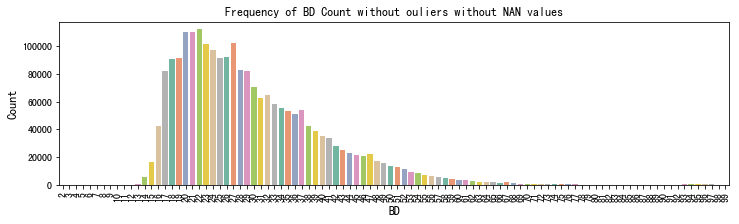

In [11]:
tmp_bd = KKboxMembers[(KKboxMembers.bd != "NaN") & (KKboxMembers.bd != -1)]
plt.figure(figsize=(12,3))
bd_order_2 = tmp_bd['bd'].unique()
bd_order_2 = sorted(bd_order_2, key=lambda x: float(x))
sns.countplot(x="bd", data=tmp_bd , order = bd_order_2, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count without ouliers without NAN values", fontsize=12)
plt.show()

In [12]:
del tmp_bd

* **特徵registered_via：**

特徵registered_via共有18 項，應該是編碼過的


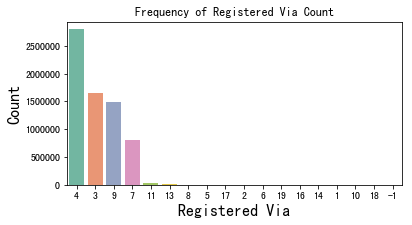

In [18]:
print('特徵registered_via共有',end='')
print(len(KKboxMembers['registered_via'].unique()),'項，應該是編碼過的')
plt.figure(figsize=(6,3))
R_V_order = KKboxMembers['registered_via'].unique()
sns.countplot(x="registered_via", data=KKboxMembers, order=KKboxMembers["registered_via"].value_counts().index, palette = "Set2")
plt.ylabel('Count', fontsize=16)
plt.xlabel('Registered Via', fontsize=16)
plt.title("Frequency of Registered Via Count", fontsize=12)
plt.show()

In [19]:
print(100*(KKboxMembers.isnull().sum()/len(KKboxMembers))) # 各特徵missing value比例

msno                       0.000000
gender                    65.433528
city                       0.000000
bd                         0.000000
registered_via             0.000000
registration_init_time     0.000000
dtype: float64


* **特徵registration_init_time：**

In [20]:
d = ['registration_init_time']
for col in d:
  KKboxMembers[col] = fast_datetime(KKboxMembers[col])

##### 存成csv

In [26]:
KKboxMembers.to_csv('KKboxMembers.csv',index=False,header=True)